# UBER DATA ANALYSIS

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('seaborn')
import calendar

### Read the Dataset 

In [ ]:
uber_data = pd.read_csv ('My Uber Drives - 2016.csv')
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Describe the Data

In [ ]:
uber_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


### Check the Null Values

In [ ]:
uber_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

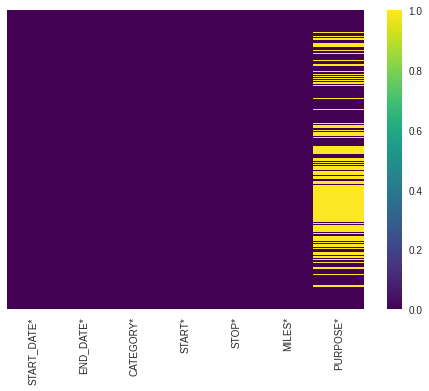

In [ ]:
sns.heatmap(uber_data.isnull(), yticklabels=False, cmap = "viridis")

### Drop the Null Values

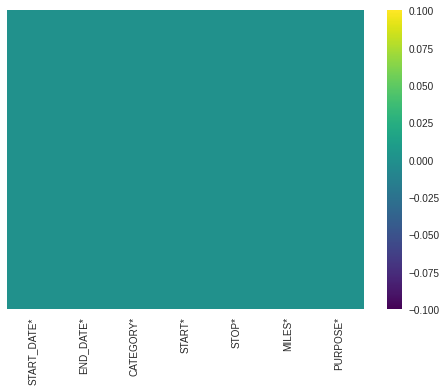

In [ ]:
uber_data = uber_data.dropna()
sns.heatmap(uber_data.isnull(),yticklabels=False, cmap="viridis")

### Transforming the Data

- Getting an hour, day, days of the week, a month from the date of the trip.

In [ ]:
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'], format="%m/%d/%Y %H:%M" )
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'], format="%m/%d/%Y %H:%M")

In [ ]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for x in uber_data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
uber_data['HOUR'] = hour
uber_data['DAY'] = day
uber_data['DAY_OF_WEEK'] = dayofweek
uber_data['MONTH'] = month
uber_data['WEEKDAY'] = weekday

In [ ]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


### Finding travelling time

In [ ]:
time = []
uber_data['TRAVELLING_TIME'] = uber_data['END_DATE*'] - uber_data['START_DATE*']
for i in uber_data['TRAVELLING_TIME']:
    time.append(i.seconds/60)
uber_data['TRAVELLING_TIME'] = time
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


### Calculating Avg speed of the Trip

In [ ]:
uber_data['TRAVELLING_TIME'] = uber_data['TRAVELLING_TIME']/60
uber_data['SPEED'] = uber_data['MILES*']/uber_data['TRAVELLING_TIME']
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0.000028,183600.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0.000060,79753.846154
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.000065,72514.285714
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,0.000310,205361.194030
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0.000019,232200.000000


### Visualizing the Data

- Different categories of data. From data, we can see most of the people use UBER for business purposes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


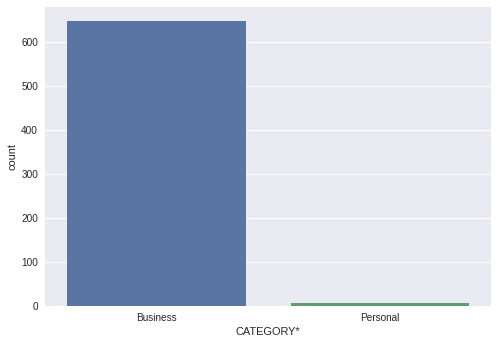

In [ ]:
sns.countplot(uber_data['CATEGORY*'])

### Histogram for miles

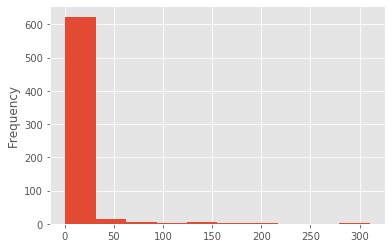

In [ ]:
uber_data['MILES*'].plot.hist()

### Purpose of the trip

Object `annotate` not found.


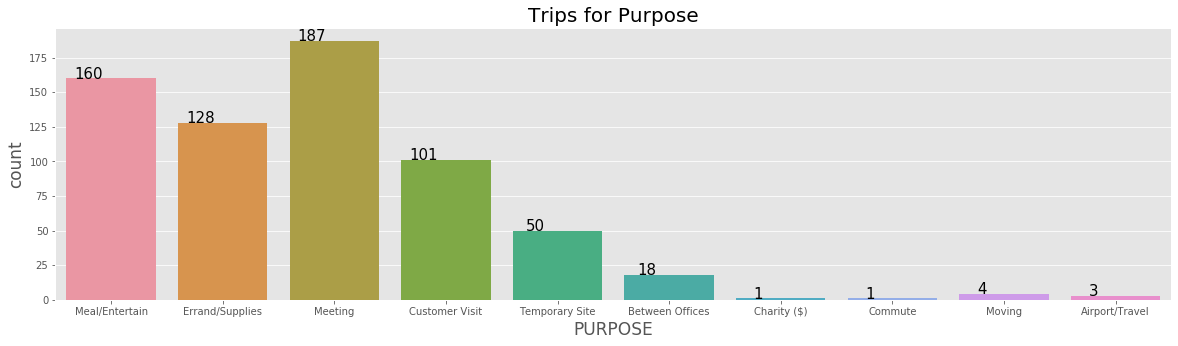

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['PURPOSE*'])
ax.set_title("Trips for Purpose", fontsize = 20)
plt.xlabel("PURPOSE",fontsize=17)
plt.ylabel("count", fontsize=17)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

### Trips per hour of the day.

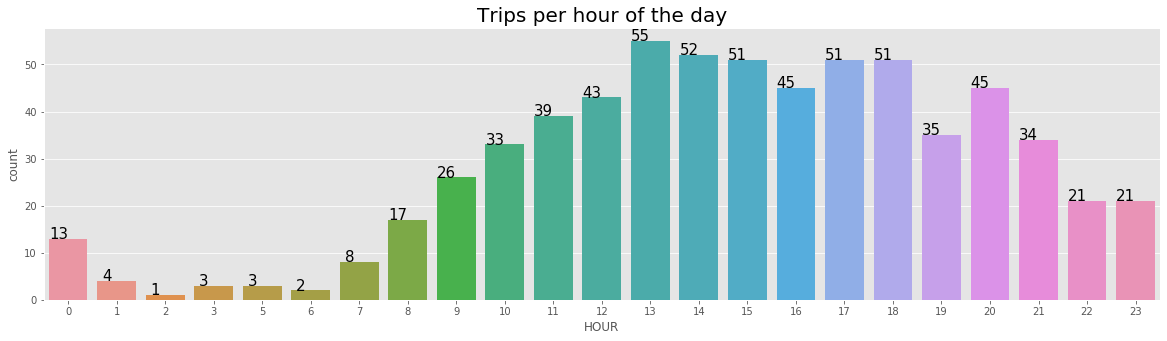

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['HOUR'])
ax.set_title("Trips per hour of the day", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

### Trips per day of a week.

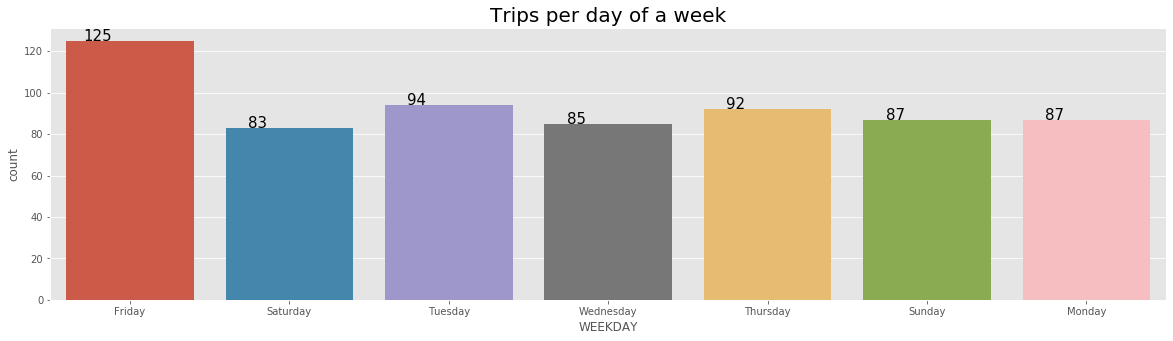

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['WEEKDAY'])
ax.set_title("Trips per day of a week", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

### Trips per day of the month

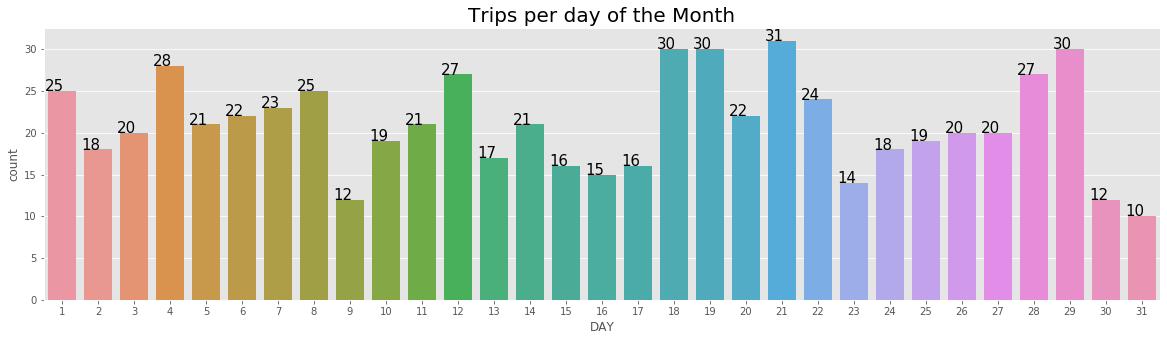

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['DAY'])
ax.set_title("Trips per day of the Month", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

### Trips in a month.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


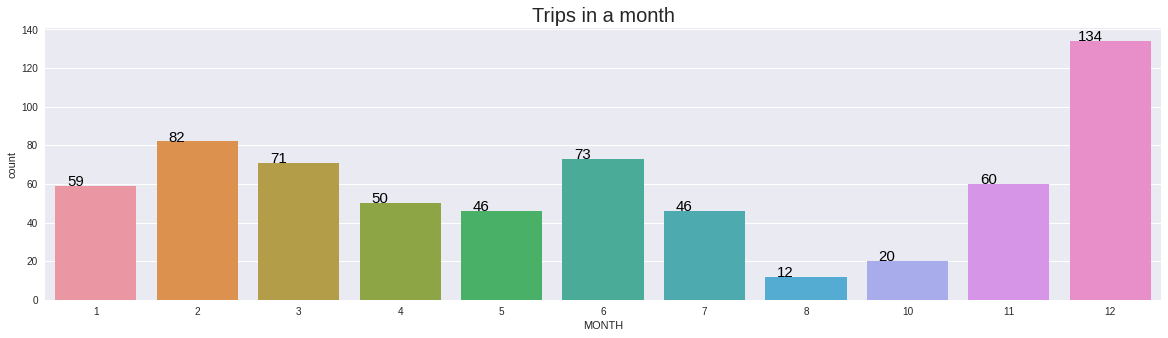

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(uber_data['MONTH'])
ax.set_title("Trips in a month", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

### Uber trips that has the starting point of San Francisco

In [ ]:
uber_data[uber_data['START*']=='San Francisco']


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
362,2016-05-09 14:39:00,2016-05-09 15:06:00,Business,San Francisco,Palo Alto,20.5,Between Offices,14,9,0,5,Monday,0.450000,45.555556
440,2016-06-14 16:09:00,2016-06-14 16:39:00,Business,San Francisco,Emeryville,11.6,Meeting,16,14,1,6,Tuesday,0.500000,23.200000
917,2016-11-07 19:17:00,2016-11-07 19:57:00,Business,San Francisco,Berkeley,13.2,Between Offices,19,7,0,11,Monday,0.666667,19.800000
919,2016-11-08 12:16:00,2016-11-08 12:49:00,Business,San Francisco,Berkeley,11.3,Meeting,12,8,1,11,Tuesday,0.550000,20.545455
927,2016-11-09 18:40:00,2016-11-09 19:17:00,Business,San Francisco,Oakland,12.7,Customer Visit,18,9,2,11,Wednesday,0.616667,20.594595
933,2016-11-10 15:17:00,2016-11-10 15:22:00,Business,San Francisco,Oakland,9.9,Temporary Site,15,10,3,11,Thursday,0.083333,118.800000
966,2016-11-15 20:44:00,2016-11-15 21:00:00,Business,San Francisco,Berkeley,11.8,Temporary Site,20,15,1,11,Tuesday,0.266667,44.250000


### The starting points of trips. 

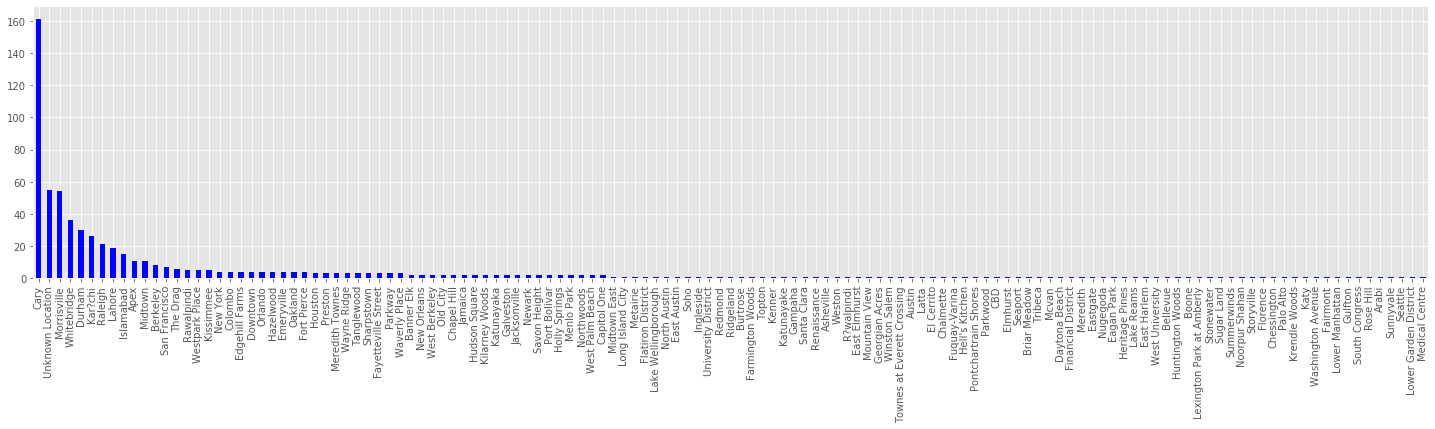

In [ ]:
uber_data['START*'].value_counts().plot(kind = 'bar', figsize = (25,5), color = 'blue')

### Comparing all the purpose with miles, hour, day of the month, day of the week, month, Travelling time.

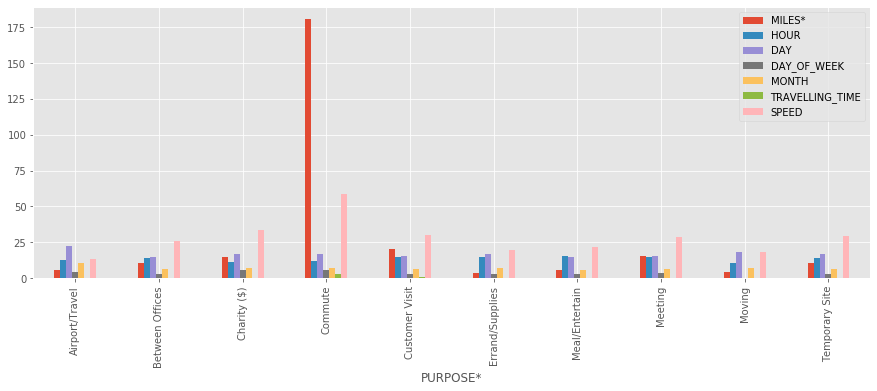

In [ ]:
uber_data.groupby('PURPOSE*').mean().plot(kind='bar', figsize=(15,5))